# Биномиальный критерий для доли

In [18]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.rcParams['figure.figsize'] = (9,5)
plt.rc('font', family='Arial')
plt.style.use('ggplot')

RANDOM_SEED = 123
np.random.seed(RANDOM_SEED)

## Shaken, not stirred

Джеймс Бонд говорит, что предпочитает мартини взболтанным, но не смешанным. Проведём слепой тест (blind test): n раз предложим ему пару напитков и выясним, какой из двух он предпочитает:

* **выборка** - бинарный вектор длины $n$, где 1 - Джеймс Бонд предпочел смешанный напиток, 0 - взболтанный;
* **гипотеза $H_0$** - Джеймс Бонд не различает 2 вида напитков и выбирает наугад;
* **статистика $t$** - количество единиц в выборке.

In [14]:
n = 16
n_samples = 1000
samples = np.random.randint(2, size=(n_samples, n))
samples.shape

(1000, 16)

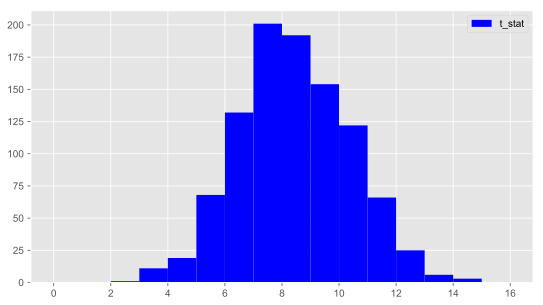

In [34]:
t_stat = np.array([i for i in map(sum, samples)])
_ = plt.hist(t_stat, bins=n, color='b', range=(0, n), label='t_stat')
_ = plt.legend()

Нулевое распределение статистики — биномиальное $Bin(n, 0.5)$

## Двусторонняя альтернатива

**гипотеза $H_1$** - Джеймс Бонд предпочитает какой-то определённый вид мартини.

In [20]:
sts.binom_test(12, n, 0.5, alternative='two-sided')

0.076812744140625

In [21]:
sts.binom_test(13, n, 0.5, alternative='two-sided')

0.021270751953125

In [29]:
sts.binom_test(8, n, 0.5, alternative='two-sided')

1.0

In [35]:
sts.binom_test(t_stat.mean(), n, 0.5, alternative='two-sided')

0.80361938476562522

In [39]:
len(t_stat[t_stat > 8]) / len(t_stat)

0.376

## Односторонняя альтернатива

**гипотеза $H_1$** - Джеймс Бонд предпочитает смешанный напиток.

In [22]:
sts.binom_test(12, n, 0.5, alternative='greater')

0.0384063720703125

In [23]:
sts.binom_test(11, n, 0.5, alternative='greater')

0.10505676269531246